# WTS Pipeline Integration
Exploratory notebook for working on birdnet embeddings

### Imports and Setup

In [1]:
import pandas as pd
import os
import numpy as np
from annotation_post_processing import *

In [2]:
embeddingColumns = [str(i) for i in range(420)]
columnNames = ["START", "END"] + embeddingColumns
path = './input/cosmos_embeddings/'

In [3]:
import pandas as pd
import os

def generate_embeddings_from_file(path, filename):
    with open(path + filename, 'r') as f:
        data = f.read()
    with open(path + filename, 'w') as f:
        f.write(",".join(data.split("\t")))
    file_df = pd.read_csv(path + filename, names = columnNames)
    file_df["IN FILE"] = filename[:filename.index(".birdnet")] + ".wav"
    file_df["FILE SPECIES"] = " ".join(filename.split(" ")[2:4])
    return file_df

def generate_embeddings(path):
    df = pd.DataFrame()
    for filename in os.listdir(path):
        try:
            df = pd.concat([df, generate_embeddings_from_file(path, filename)], ignore_index = True)
            print("Done with " + filename)
        except Exception as e:
            print("Something went wrong with: " + filename)
    df["PATH"] = path
    columns = df.columns.tolist()
    columns = columns[-2:] + columns[:-2]
    df = df[columns]
    df = df.sort_values(["IN FILE", "START"], ascending = True)
    df = df.reset_index(drop = True)
    return df

In [4]:
embeddings_df = generate_embeddings(path)
embeddings_df

Done with XC63636 - Southern Nightingale-Wren - Microcerculus marginatus.birdnet.embeddings.txt
Done with XC84810 - Rufous-collared Sparrow - Zonotrichia capensis subtorquata.birdnet.embeddings.txt
Done with XC64386 - Buff-throated Woodcreeper - Xiphorhynchus guttatus.birdnet.embeddings.txt
Done with XC98265 - Yellow-olive Flatbill - Tolmomyias sulphurescens confusus.birdnet.embeddings.txt
Done with XC601007 - Rufous-collared Sparrow - Zonotrichia capensis.birdnet.embeddings.txt
Done with XC484117 - Buff-throated Woodcreeper - Xiphorhynchus guttatus.birdnet.embeddings.txt
Done with XC699683 - Yellow-olive Flatbill - Tolmomyias sulphurescens.birdnet.embeddings.txt
Done with XC301004 - Rufous-collared Sparrow - Zonotrichia capensis.birdnet.embeddings.txt
Done with XC104217 - Slate-throated Whitestart - Myioborus miniatus.birdnet.embeddings.txt
Done with XC609552 - White-throated Toucan - Ramphastos tucanus.birdnet.embeddings.txt
Done with XC128171 - Rufous-collared Sparrow - Zonotrichia 

,FILE SPECIES,PATH,START,END,0,1,2,3,4,5,...,411,412,413,414,415,416,417,418,419,IN FILE
0,Southern Nightingale-Wren,./input/cosmos_embeddings/,0.0,3.0,0.516491,0.650946,0.447532,0.008416,0.976974,0.210846,...,0.764997,0.224773,0.307177,0.618153,0.572281,0.898645,0.424682,0.784120,0.582382,XC100027 - Southern Nightingale-Wren - Microce...
1,Southern Nightingale-Wren,./input/cosmos_embeddings/,3.0,6.0,0.332206,0.504845,0.053778,0.049535,0.893746,0.282089,...,0.414043,0.599959,0.683068,0.572789,0.827336,0.678146,0.956513,0.310204,0.560730,XC100027 - Southern Nightingale-Wren - Microce...
2,Southern Nightingale-Wren,./input/cosmos_embeddings/,6.0,9.0,0.508598,0.422192,0.175864,0.046417,1.243934,0.341751,...,0.344001,0.751044,0.310172,1.276110,0.756434,0.482373,0.850690,0.280638,1.044262,XC100027 - Southern Nightingale-Wren - Microce...
3,Southern Nightingale-Wren,./input/cosmos_embeddings/,9.0,12.0,0.834292,0.763748,0.289305,0.254106,0.966129,0.475406,...,0.837616,0.776913,0.834856,1.046136,1.034076,0.706145,0.880231,0.625652,0.480209,XC100027 - Southern Nightingale-Wren - Microce...
4,Southern Nightingale-Wren,./input/cosmos_embeddings/,12.0,15.0,0.775968,0.195914,0.237553,0.111716,1.452784,0.297751,...,0.739770,1.074138,0.476351,1.474918,1.059757,0.871452,1.035708,0.440124,0.510227,XC100027 - Southern Nightingale-Wren - Microce...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39953,Blue-grey Tanager,./input/cosmos_embeddings/,0.0,3.0,1.055252,1.559146,1.135013,1.333304,0.308816,0.951709,...,0.277709,0.623836,0.808401,0.348465,0.968598,0.382283,2.083897,0.000000,0.639748,XC9881 - Blue-grey Tanager - Thraupis episcopu...
39954,Blue-grey Tanager,./input/cosmos_embeddings/,3.0,6.0,1.132612,0.653347,1.251634,0.573085,0.714166,1.560998,...,0.457551,0.526104,0.413813,0.551209,0.755623,0.408722,0.310266,0.451188,0.295859,XC9881 - Blue-grey Tanager - Thraupis episcopu...
39955,Blue-grey Tanager,./input/cosmos_embeddings/,6.0,9.0,1.082742,0.205875,0.709146,0.203989,0.907365,0.756531,...,0.156727,0.067946,0.902726,0.399330,0.752100,0.304018,1.156913,0.044347,1.153144,XC9881 - Blue-grey Tanager - Thraupis episcopu...
39956,Blue-grey Tanager,./input/cosmos_embeddings/,9.0,12.0,1.338971,0.901556,1.706767,0.925638,0.152560,1.294218,...,0.189816,0.188148,0.987711,0.478155,0.284822,0.135123,0.540614,0.374931,0.047007,XC9881 - Blue-grey Tanager - Thraupis episcopu...


In [5]:
automated_dfs:list[pd.DataFrame] = []
automated_dfs.append(pd.read_csv("./cosmos_annotations/automated_cosmos_tweety_to_file.csv"))
automated_dfs.append(pd.read_csv("./cosmos_annotations/COSMOS_BirdNET-Lite_Labels_05Conf.csv"))
automated_dfs.append(pd.read_csv("./cosmos_annotations/COSMOS_BirdNET-Lite_Labels_100.csv"))
automated_dfs.append(pd.read_csv("./cosmos_annotations/COSMOS_BirdNET-Lite-Filename_Labels_05Conf.csv"))
automated_dfs.append(pd.read_csv("./cosmos_annotations/COSMOS_Microfaune-Filename_Labels_100.csv"))
print(automated_dfs)

[       Unnamed: 0    OFFSET  DURATION  \
0               0  1.883721  0.116279   
1               1  3.976744  0.046512   
2               2  5.976744  0.046512   
3               3  6.023256  0.046512   
4               4  6.069767  0.116279   
...           ...       ...       ...   
55642       55642  1.511628  0.325581   
55643       55643  1.860465  0.139535   
55644       55644  5.976744  0.372093   
55645       55645  6.627907  0.255814   
55646       55646  0.046512  0.255814   

                                         FOLDER  \
0      C:/Users/Siloux/Desktop/E4E/Cosmos_data/   
1      C:/Users/Siloux/Desktop/E4E/Cosmos_data/   
2      C:/Users/Siloux/Desktop/E4E/Cosmos_data/   
3      C:/Users/Siloux/Desktop/E4E/Cosmos_data/   
4      C:/Users/Siloux/Desktop/E4E/Cosmos_data/   
...                                         ...   
55642  C:/Users/Siloux/Desktop/E4E/Cosmos_data/   
55643  C:/Users/Siloux/Desktop/E4E/Cosmos_data/   
55644  C:/Users/Siloux/Desktop/E4E/Cosmos_data/

In [6]:
# Data Cleaning
embeddings_df = embeddings_df.dropna(subset=embeddingColumns)
embeddings_df

,FILE SPECIES,PATH,START,END,0,1,2,3,4,5,...,411,412,413,414,415,416,417,418,419,IN FILE
0,Southern Nightingale-Wren,./input/cosmos_embeddings/,0.0,3.0,0.516491,0.650946,0.447532,0.008416,0.976974,0.210846,...,0.764997,0.224773,0.307177,0.618153,0.572281,0.898645,0.424682,0.784120,0.582382,XC100027 - Southern Nightingale-Wren - Microce...
1,Southern Nightingale-Wren,./input/cosmos_embeddings/,3.0,6.0,0.332206,0.504845,0.053778,0.049535,0.893746,0.282089,...,0.414043,0.599959,0.683068,0.572789,0.827336,0.678146,0.956513,0.310204,0.560730,XC100027 - Southern Nightingale-Wren - Microce...
2,Southern Nightingale-Wren,./input/cosmos_embeddings/,6.0,9.0,0.508598,0.422192,0.175864,0.046417,1.243934,0.341751,...,0.344001,0.751044,0.310172,1.276110,0.756434,0.482373,0.850690,0.280638,1.044262,XC100027 - Southern Nightingale-Wren - Microce...
3,Southern Nightingale-Wren,./input/cosmos_embeddings/,9.0,12.0,0.834292,0.763748,0.289305,0.254106,0.966129,0.475406,...,0.837616,0.776913,0.834856,1.046136,1.034076,0.706145,0.880231,0.625652,0.480209,XC100027 - Southern Nightingale-Wren - Microce...
4,Southern Nightingale-Wren,./input/cosmos_embeddings/,12.0,15.0,0.775968,0.195914,0.237553,0.111716,1.452784,0.297751,...,0.739770,1.074138,0.476351,1.474918,1.059757,0.871452,1.035708,0.440124,0.510227,XC100027 - Southern Nightingale-Wren - Microce...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39953,Blue-grey Tanager,./input/cosmos_embeddings/,0.0,3.0,1.055252,1.559146,1.135013,1.333304,0.308816,0.951709,...,0.277709,0.623836,0.808401,0.348465,0.968598,0.382283,2.083897,0.000000,0.639748,XC9881 - Blue-grey Tanager - Thraupis episcopu...
39954,Blue-grey Tanager,./input/cosmos_embeddings/,3.0,6.0,1.132612,0.653347,1.251634,0.573085,0.714166,1.560998,...,0.457551,0.526104,0.413813,0.551209,0.755623,0.408722,0.310266,0.451188,0.295859,XC9881 - Blue-grey Tanager - Thraupis episcopu...
39955,Blue-grey Tanager,./input/cosmos_embeddings/,6.0,9.0,1.082742,0.205875,0.709146,0.203989,0.907365,0.756531,...,0.156727,0.067946,0.902726,0.399330,0.752100,0.304018,1.156913,0.044347,1.153144,XC9881 - Blue-grey Tanager - Thraupis episcopu...
39956,Blue-grey Tanager,./input/cosmos_embeddings/,9.0,12.0,1.338971,0.901556,1.706767,0.925638,0.152560,1.294218,...,0.189816,0.188148,0.987711,0.478155,0.284822,0.135123,0.540614,0.374931,0.047007,XC9881 - Blue-grey Tanager - Thraupis episcopu...


### Visualizations

In [7]:
%matplotlib inline
import hdbscan
from hdbscan import HDBSCAN
from hdbscan.prediction import approximate_predict
import pickle
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.preprocessing import LabelEncoder
from umap import UMAP

plt.style.use("ggplot")

In [8]:
# UMAP reduction
reducer = UMAP()
embeddings_new = reducer.fit_transform(embeddings_df[embeddingColumns])
embeddings_new.shape

(39951, 2)

<AxesSubplot:>

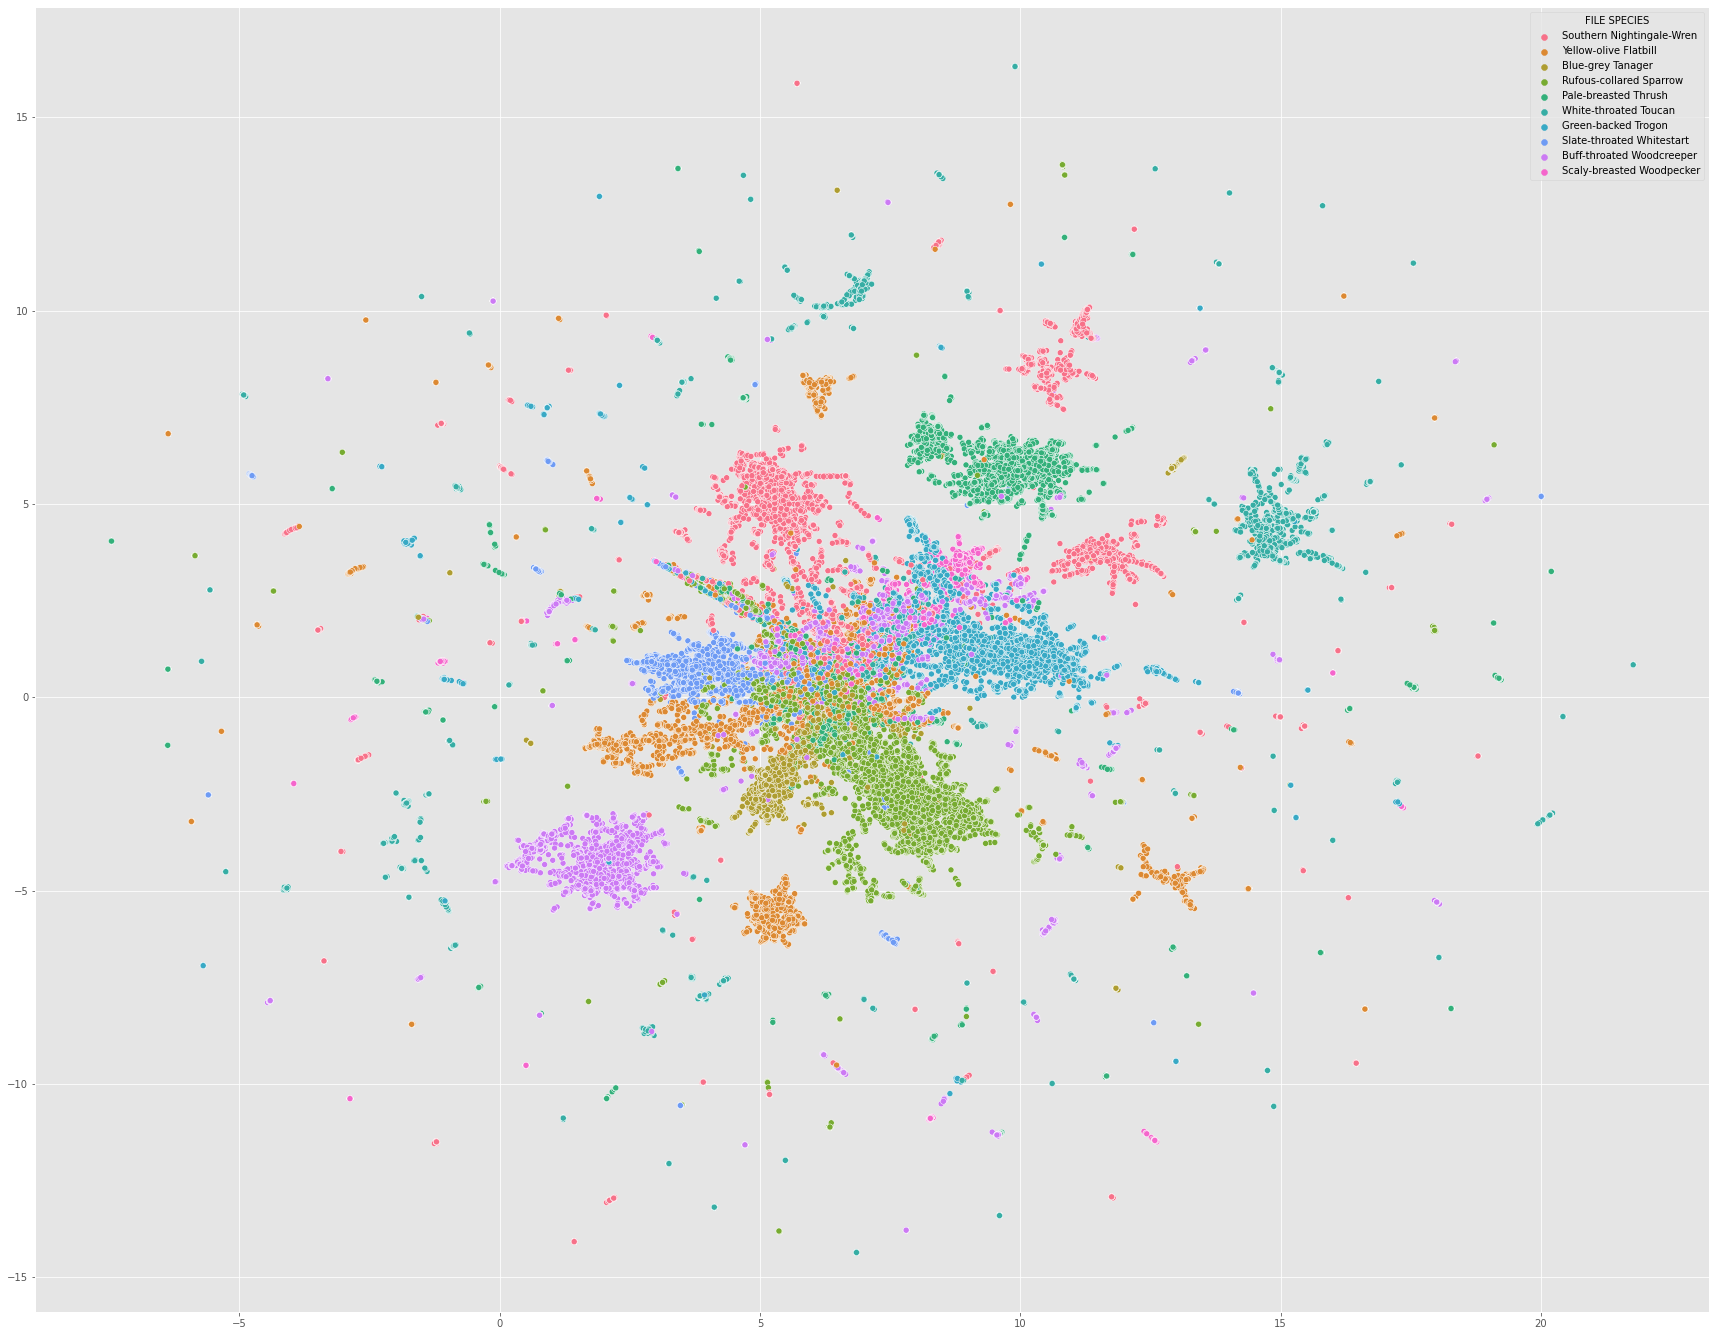

In [9]:
fig = plt.figure(figsize = (30, 24))
ax = plt.axes()

# All species at once
sns.scatterplot(ax=ax, x = embeddings_new.T[0], y = embeddings_new.T[1], hue = embeddings_df["FILE SPECIES"])

In [10]:
def find_class(x: pd.Series, manual: pd.DataFrame = automated_dfs[2]) -> pd.DataFrame:
    x["HUE"] = "none"
    file = manual[manual["IN FILE"].str.startswith(x["IN FILE"].split(".wav")[0])]
    offsets = file["OFFSET"].to_numpy()
    close_offsets = np.isclose(offsets, x["START"])
    if close_offsets.sum() >= 1:
        spec = file.iloc[np.where(close_offsets == True)[0][0],:]["MANUAL ID"]
        if spec == " ".join(x["IN FILE"].split(" ")[5:7]):
            x["HUE"] = spec
    return x

/var/folders/ks/99htv0hs3nd8t_gtw71b_6n40000gn/T/ipykernel_33456/719421454.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  species_specific["UMAP_0"] = embeddings[0]
/var/folders/ks/99htv0hs3nd8t_gtw71b_6n40000gn/T/ipykernel_33456/719421454.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  species_specific["UMAP_1"] = embeddings[1]


DONE


/var/folders/ks/99htv0hs3nd8t_gtw71b_6n40000gn/T/ipykernel_33456/719421454.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  species_specific["UMAP_0"] = embeddings[0]
/var/folders/ks/99htv0hs3nd8t_gtw71b_6n40000gn/T/ipykernel_33456/719421454.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  species_specific["UMAP_1"] = embeddings[1]


DONE


/var/folders/ks/99htv0hs3nd8t_gtw71b_6n40000gn/T/ipykernel_33456/719421454.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  species_specific["UMAP_0"] = embeddings[0]
/var/folders/ks/99htv0hs3nd8t_gtw71b_6n40000gn/T/ipykernel_33456/719421454.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  species_specific["UMAP_1"] = embeddings[1]


DONE


/var/folders/ks/99htv0hs3nd8t_gtw71b_6n40000gn/T/ipykernel_33456/719421454.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  species_specific["UMAP_0"] = embeddings[0]
/var/folders/ks/99htv0hs3nd8t_gtw71b_6n40000gn/T/ipykernel_33456/719421454.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  species_specific["UMAP_1"] = embeddings[1]


DONE


/var/folders/ks/99htv0hs3nd8t_gtw71b_6n40000gn/T/ipykernel_33456/719421454.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  species_specific["UMAP_0"] = embeddings[0]
/var/folders/ks/99htv0hs3nd8t_gtw71b_6n40000gn/T/ipykernel_33456/719421454.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  species_specific["UMAP_1"] = embeddings[1]


DONE


/var/folders/ks/99htv0hs3nd8t_gtw71b_6n40000gn/T/ipykernel_33456/719421454.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  species_specific["UMAP_0"] = embeddings[0]
/var/folders/ks/99htv0hs3nd8t_gtw71b_6n40000gn/T/ipykernel_33456/719421454.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  species_specific["UMAP_1"] = embeddings[1]


DONE


/var/folders/ks/99htv0hs3nd8t_gtw71b_6n40000gn/T/ipykernel_33456/719421454.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  species_specific["UMAP_0"] = embeddings[0]
/var/folders/ks/99htv0hs3nd8t_gtw71b_6n40000gn/T/ipykernel_33456/719421454.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  species_specific["UMAP_1"] = embeddings[1]


DONE


/var/folders/ks/99htv0hs3nd8t_gtw71b_6n40000gn/T/ipykernel_33456/719421454.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  species_specific["UMAP_0"] = embeddings[0]
/var/folders/ks/99htv0hs3nd8t_gtw71b_6n40000gn/T/ipykernel_33456/719421454.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  species_specific["UMAP_1"] = embeddings[1]


DONE


/var/folders/ks/99htv0hs3nd8t_gtw71b_6n40000gn/T/ipykernel_33456/719421454.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  species_specific["UMAP_0"] = embeddings[0]
/var/folders/ks/99htv0hs3nd8t_gtw71b_6n40000gn/T/ipykernel_33456/719421454.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  species_specific["UMAP_1"] = embeddings[1]


DONE
DONE


/var/folders/ks/99htv0hs3nd8t_gtw71b_6n40000gn/T/ipykernel_33456/719421454.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  species_specific["UMAP_0"] = embeddings[0]
/var/folders/ks/99htv0hs3nd8t_gtw71b_6n40000gn/T/ipykernel_33456/719421454.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  species_specific["UMAP_1"] = embeddings[1]


Text(0.5, 0.98, 'UMAP Projections of Each Species')

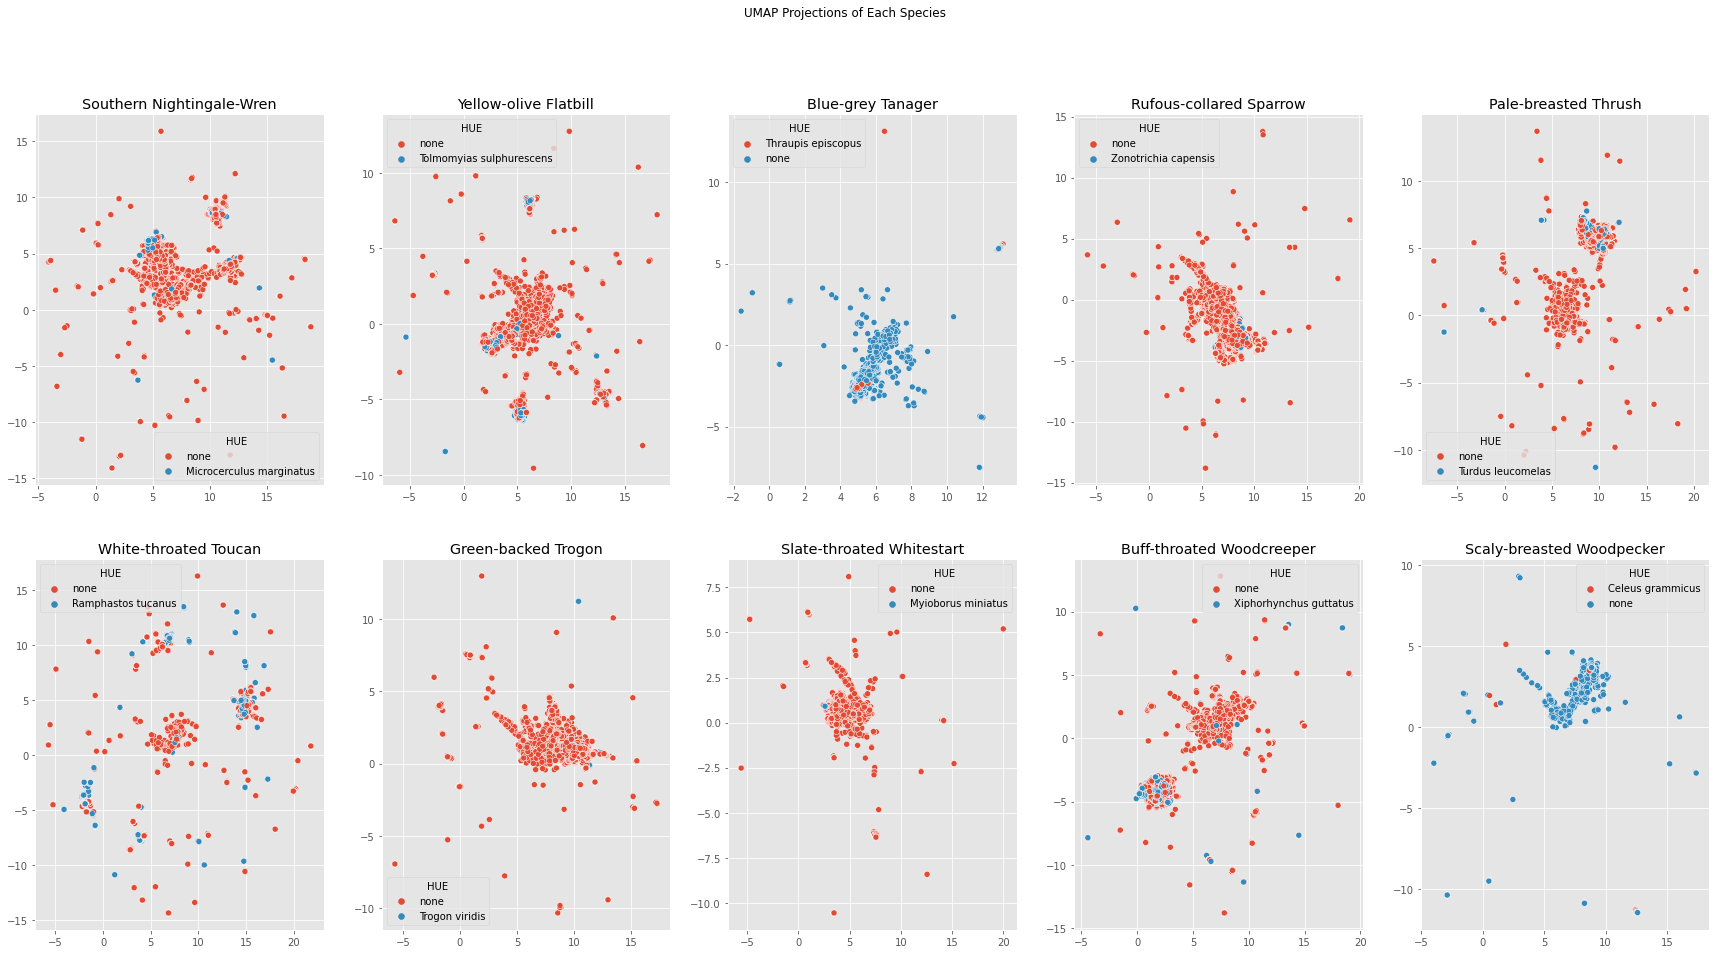

In [12]:
figure, axes = plt.subplots(2, 5, figsize = (30, 15))

x = 0
y = 0

embeddings_all = pd.DataFrame()

for species in embeddings_df["FILE SPECIES"].unique():
    species_specific = embeddings_df[embeddings_df["FILE SPECIES"] == species]
    embeddings = reducer.transform(species_specific[embeddingColumns]).T
    species_specific = species_specific.apply(func=find_class, axis = 1)
    species_specific["UMAP_0"] = embeddings[0]
    species_specific["UMAP_1"] = embeddings[1]
    embeddings_all = pd.concat([embeddings_all, species_specific], ignore_index = True)
    graph = sns.scatterplot(ax = axes[x, y], x = embeddings[0], y = embeddings[1], hue = species_specific["HUE"])
    graph.set_title(species)
    
    if y < 4:
        y += 1
    else:
        x += 1
        y = 0
    
    print("DONE")

figure.suptitle("UMAP Projections of Each Species")

In [31]:
embeddings_all[["FILE SPECIES", "HUE"]][embeddings_all["HUE"] == "none"].groupby("FILE SPECIES").count()

,HUE
FILE SPECIES,
Blue-grey Tanager,1500
Buff-throated Woodcreeper,3662
Green-backed Trogon,3890
Pale-breasted Thrush,4084
Rufous-collared Sparrow,5429
Scaly-breasted Woodpecker,1227
Slate-throated Whitestart,2114
Southern Nightingale-Wren,5289
White-throated Toucan,2633


In [32]:
embeddings_all[["FILE SPECIES", "HUE"]][embeddings_all["HUE"] != "none"].groupby("FILE SPECIES").count()

,HUE
FILE SPECIES,
Blue-grey Tanager,295
Buff-throated Woodcreeper,1052
Green-backed Trogon,337
Pale-breasted Thrush,371
Rufous-collared Sparrow,606
Scaly-breasted Woodpecker,64
Slate-throated Whitestart,123
Southern Nightingale-Wren,757
White-throated Toucan,1492
